In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000070858"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000070858
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,BANK OF AMERICA CORP /DE/
Ticker,BAC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,68.0,2.518735e+01,4.972067e+00,1.983000e+01,2.116750e+01,2.405500e+01,2.817500e+01,4.701000e+01
interest income,67.0,1.534970e+10,3.969124e+09,7.855000e+09,1.277800e+10,1.465700e+10,1.818950e+10,2.347900e+10
net income,68.0,3.096221e+09,2.892182e+09,-8.826000e+09,2.277000e+09,3.383500e+09,4.880750e+09,7.311000e+09
net interest income,68.0,9.891368e+09,2.039885e+09,5.302000e+09,8.611000e+09,1.021000e+10,1.143275e+10,1.374900e+10
provision for loan losses,68.0,2.525338e+09,3.195385e+09,2.190000e+08,7.867500e+08,1.007000e+09,2.547000e+09,1.338000e+10
total revenue,68.0,1.992009e+10,5.657060e+09,8.522000e+09,1.673450e+10,2.055900e+10,2.268950e+10,3.575800e+10


# Plots

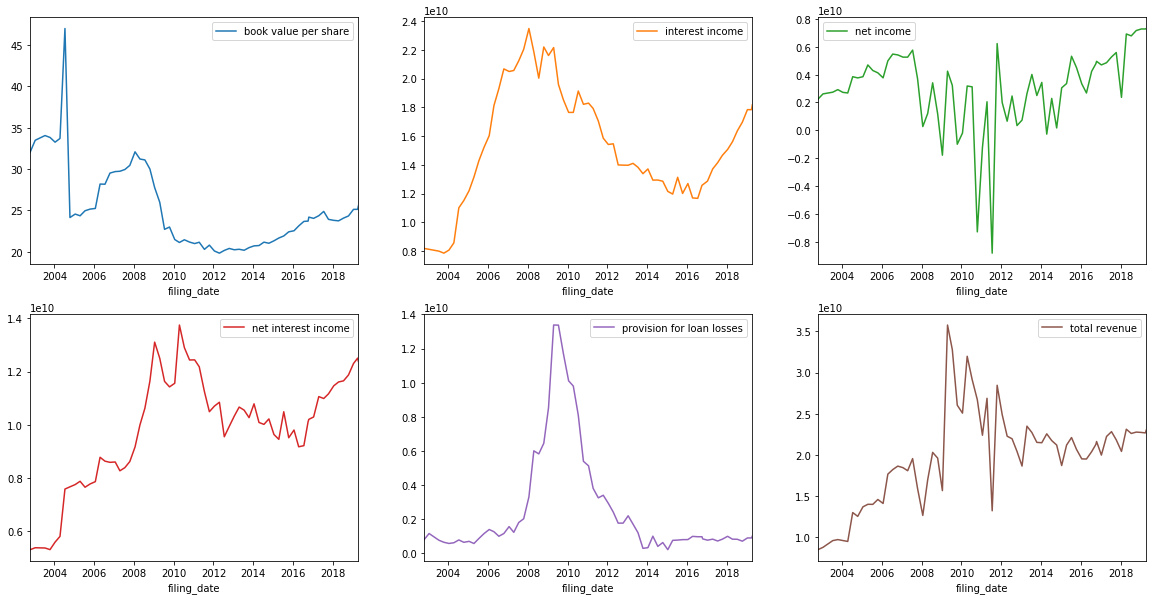

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type         message
cik        item                                                      
0000070858 book value per share       2003Q1  missing  Missing period
           interest income            2003Q1  missing  Missing period
           interest income            2010Q1  missing  Missing period
           net income                 2003Q1  missing  Missing period
           net interest income        2003Q1  missing  Missing period
           provision for loan losses  2003Q1  missing  Missing period
           total revenue              2003Q1  missing  Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()